In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'US'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without US' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
#country_df['Removed'] = country_df.Confirmed.shift(periods = 14)
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Important_countries = ['India', 'World', 'World without US',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [11]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83868,2020-04-22,4636,77861,82497,1371,0.056196,0.016347
France,157125,2020-04-22,21373,41326,62699,94426,0.340883,0.600961
Germany,150648,2020-04-22,5279,99400,104679,45969,0.050430,0.305142
India,21370,2020-04-22,681,4370,5051,16319,0.134825,0.763641
Iran,85996,2020-04-22,5391,63113,68504,17492,0.078696,0.203405
Italy,187327,2020-04-22,25085,54543,79628,107699,0.315027,0.574925
"Korea, South",10694,2020-04-22,238,8277,8515,2179,0.027951,0.203759
Spain,208389,2020-04-22,21717,85915,107632,100757,0.201771,0.483504
US,839675,2020-04-22,46583,77366,123949,715726,0.375824,0.852385


In [12]:
Doubling_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Confirmed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr/2])
    Doubling_period[cun] = [rp]
pd.DataFrame(Doubling_period)[Important_countries].transpose()

,0
Iran,23
"Korea, South",50
France,16
United Kingdom,13
China,73
Spain,21
Italy,25
Germany,22
US,15
World without US,18


In [13]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 14
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    
    #DF_Dict[cun]['Removed'] = DF_Dict[cun].Confirmed.shift(periods = 14)
    DF_Dict[cun]['Active'] = DF_Dict[cun].Confirmed - DF_Dict[cun].Removed
    DF_Dict[cun]['Mortality'] = DF_Dict[cun].Deaths/DF_Dict[cun].Removed
    DF_Dict[cun]['Part_Active'] = DF_Dict[cun].Active/DF_Dict[cun].Confirmed

    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [14]:
DC = DF_Dict['India'].columns
DF_Dict['India']#.tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-25,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-26,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-27,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-28,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-29,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-30,1,0,0,0,1,NaN,1.000000,1,0,0,0,NaN


In [15]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83868,2020-04-22,4636,77861,82497,1371,0.056196,0.016347
France,157125,2020-04-22,21373,41326,62699,94426,0.340883,0.600961
Germany,150648,2020-04-22,5279,99400,104679,45969,0.050430,0.305142
India,21370,2020-04-22,681,4370,5051,16319,0.134825,0.763641
Iran,85996,2020-04-22,5391,63113,68504,17492,0.078696,0.203405
Italy,187327,2020-04-22,25085,54543,79628,107699,0.315027,0.574925
"Korea, South",10694,2020-04-22,238,8277,8515,2179,0.027951,0.203759
Spain,208389,2020-04-22,21717,85915,107632,100757,0.201771,0.483504
US,839675,2020-04-22,46583,77366,123949,715726,0.375824,0.852385


In [16]:
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'pink', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}

def plotwithx(x, cols, DF_Dict = DF_Dict):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (14, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')
                #plt.xlim(5*10**3, 5*10**6)

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
                #plt.ylim(10**1, 10**7)
            for cun in Important_countries:
                df = DF_Dict[cun]#.tail(50)
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         #linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(Important_countries)
            plt.plot()


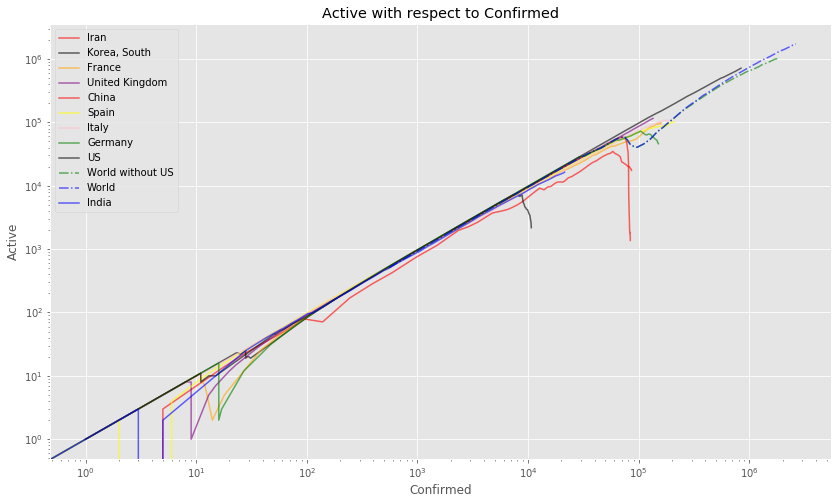

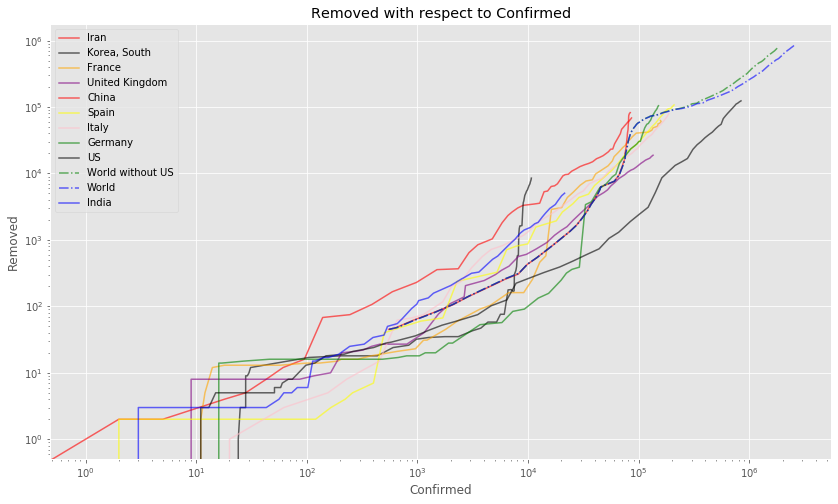

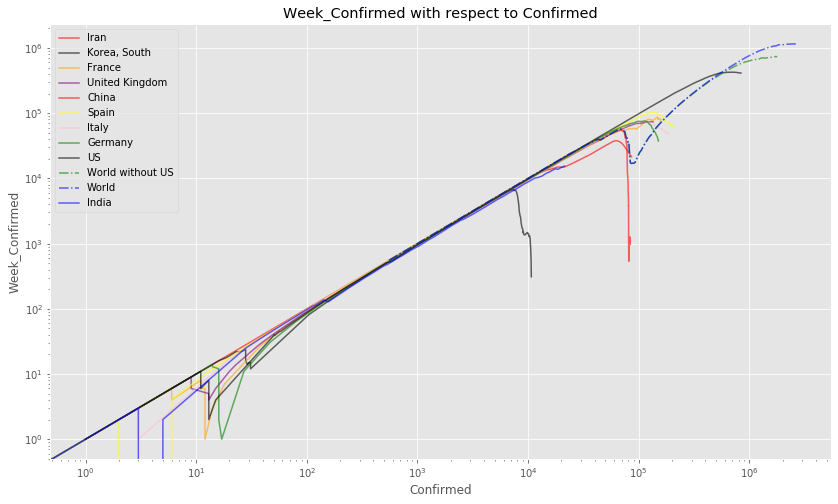

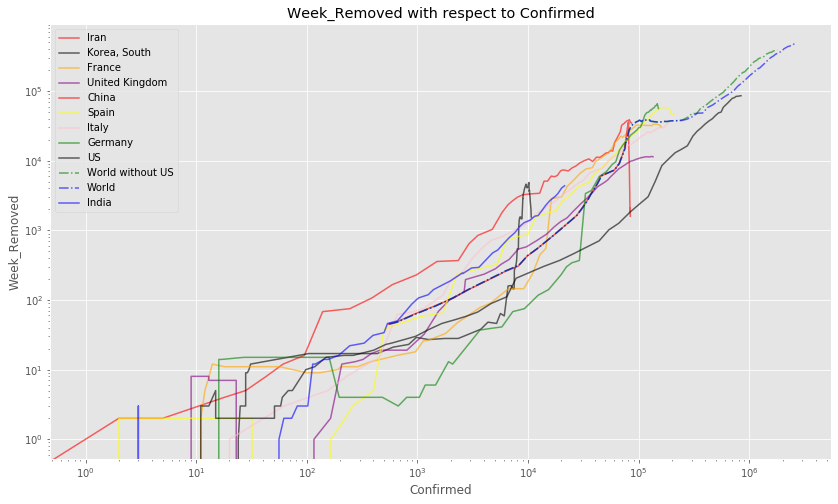

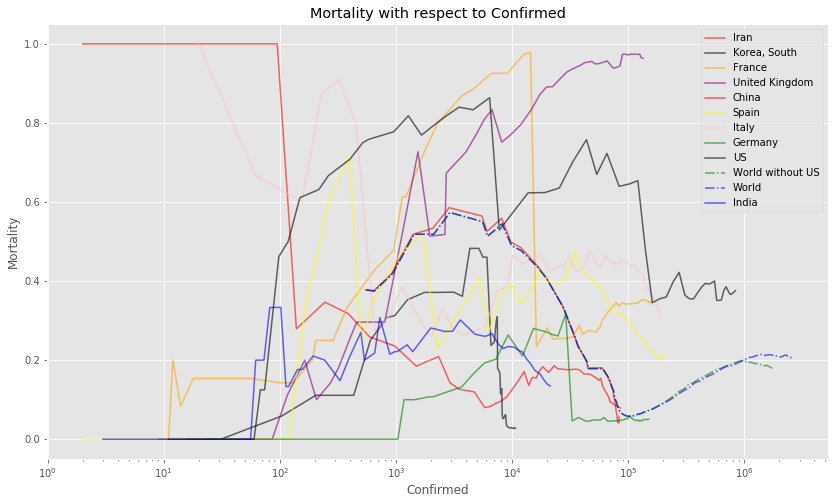

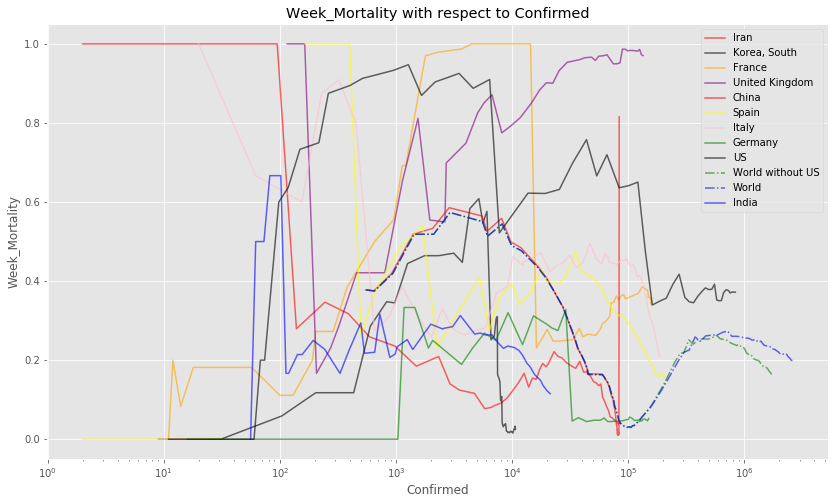

In [17]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

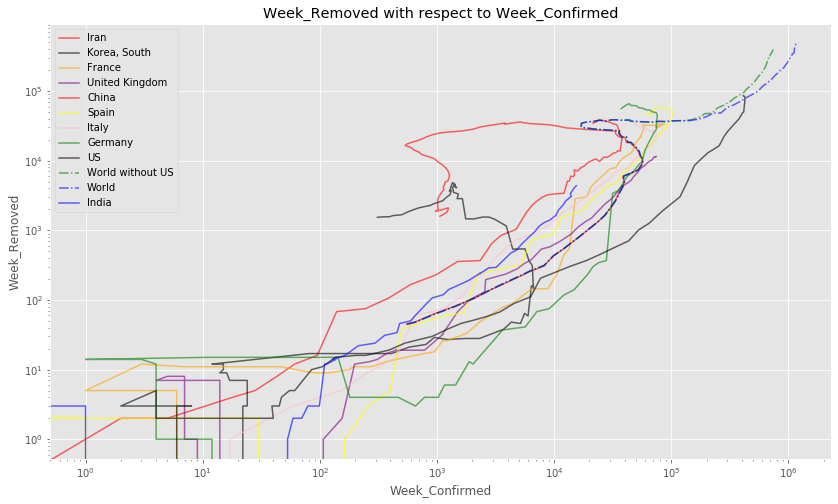

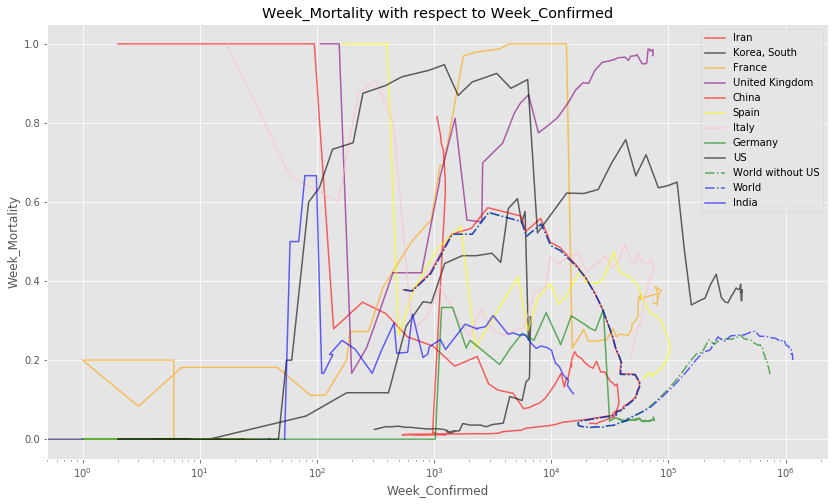

In [18]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [19]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,7338,2020-04-22,187,32,219,7119,0.853881,0.970155
Russia,57999,2020-04-22,513,4420,4933,53066,0.103994,0.914947
Portugal,21982,2020-04-22,785,1143,1928,20054,0.407158,0.912292
Singapore,10141,2020-04-22,12,896,908,9233,0.013216,0.910462
Ukraine,6592,2020-04-22,174,424,598,5994,0.290970,0.909284
Qatar,7141,2020-04-22,10,689,699,6442,0.014306,0.902115
Belarus,7281,2020-04-22,58,769,827,6454,0.070133,0.886417
Netherlands,35032,2020-04-22,4068,101,4169,30863,0.975774,0.880995
United Kingdom,134638,2020-04-22,18151,683,18834,115804,0.963736,0.860114


In [20]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Singapore,10141,2020-04-22,12,896,908,9233,0.013216,0.910462
Qatar,7141,2020-04-22,10,689,699,6442,0.014306,0.902115
Australia,6547,2020-04-22,67,4124,4191,2356,0.015987,0.359859
Malaysia,5532,2020-04-22,93,3452,3545,1987,0.026234,0.359183
"Korea, South",10694,2020-04-22,238,8277,8515,2179,0.027951,0.203759
Chile,11296,2020-04-22,160,5386,5546,5750,0.028850,0.509030
United Arab Emirates,8238,2020-04-22,52,1546,1598,6640,0.032541,0.806021
Israel,14498,2020-04-22,189,5215,5404,9094,0.034974,0.627259
Austria,14925,2020-04-22,510,11328,11838,3087,0.043082,0.206834


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


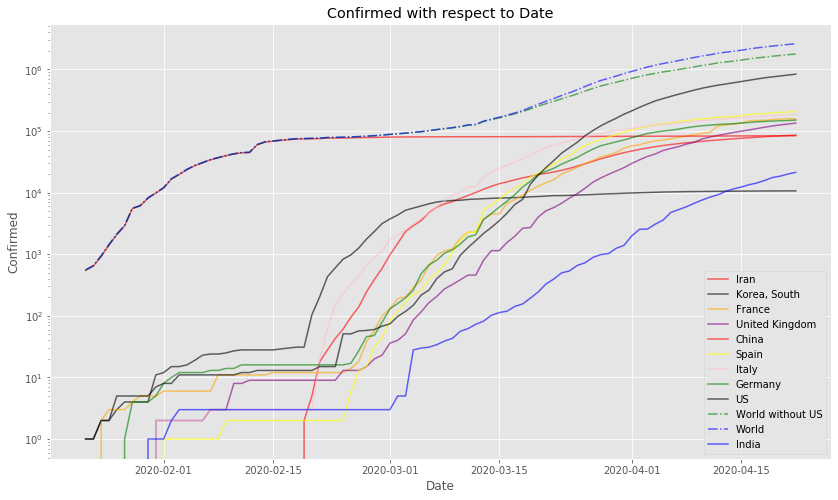

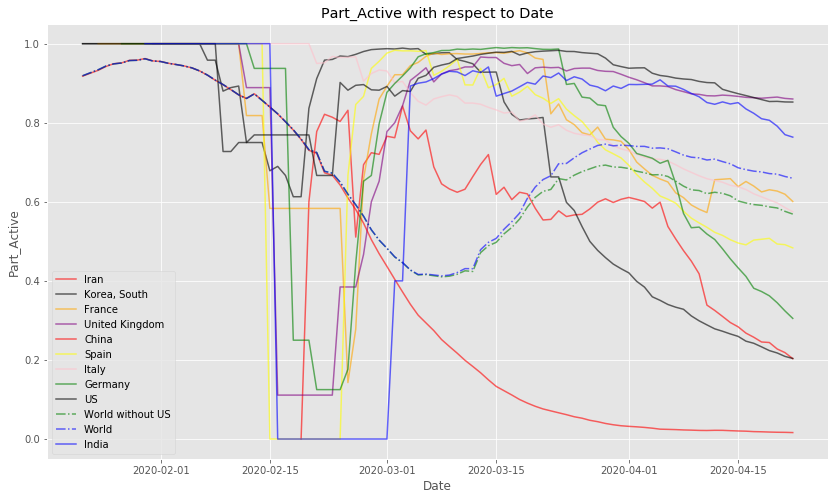

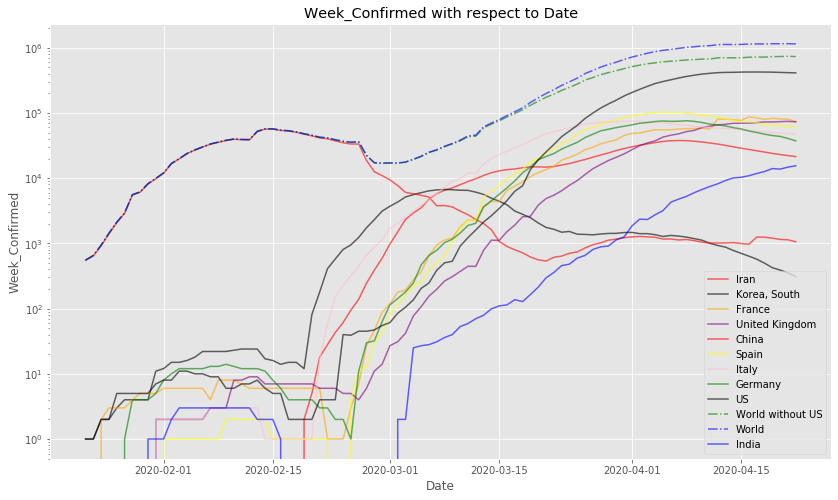

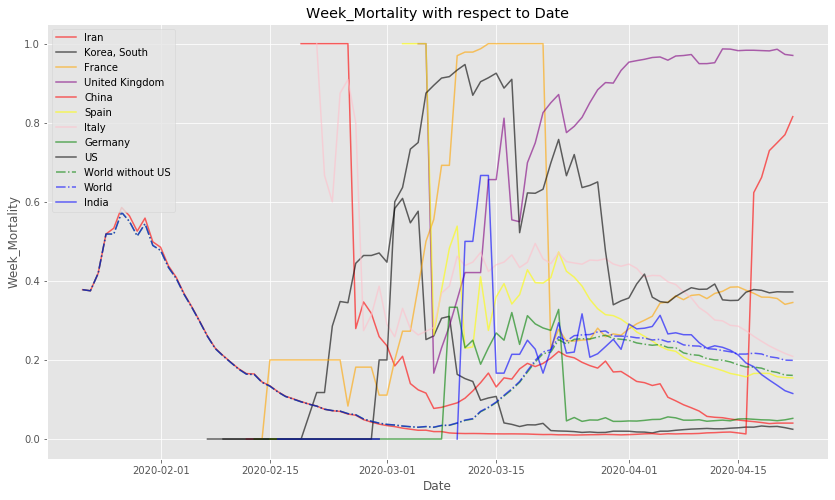

In [21]:
plotwithx('Date', ['Confirmed', 'Part_Active', 'Week_Confirmed', 'Week_Mortality'])

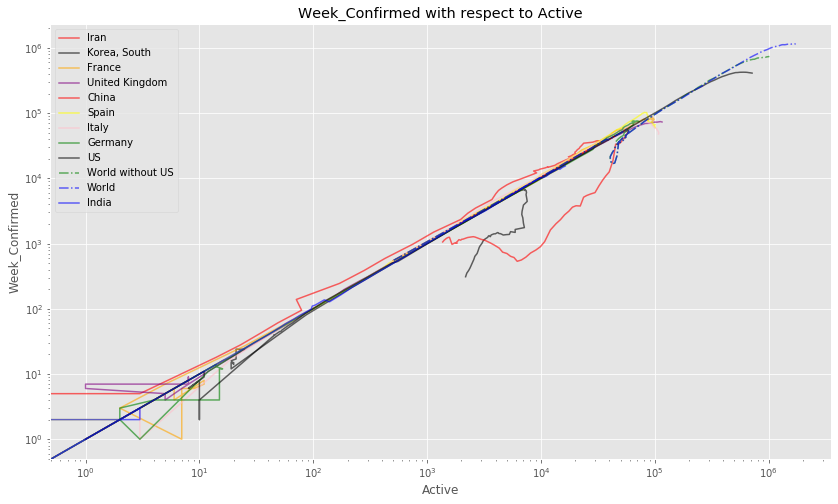

In [22]:
plotwithx('Active', ['Week_Confirmed'])

In [23]:
Removing_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Removed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr])
    Removing_period[cun] = rp
Removing_period

{'Australia': 24,
 'Austria': 18,
 'Belarus': 16,
 'Belgium': 20,
 'Brazil': 8,
 'Canada': 17,
 'Chile': 15,
 'China': 20,
 'Czechia': 27,
 'Denmark': 14,
 'Dominican Republic': 25,
 'Ecuador': 26,
 'France': 20,
 'Germany': 16,
 'India': 16,
 'Indonesia': 22,
 'Iran': 12,
 'Ireland': 10,
 'Israel': 22,
 'Italy': 28,
 'Japan': 26,
 'Korea, South': 35,
 'Malaysia': 18,
 'Mexico': 12,
 'Netherlands': 32,
 'Norway': 44,
 'Pakistan': 21,
 'Peru': 10,
 'Philippines': 25,
 'Poland': 24,
 'Portugal': 31,
 'Qatar': 23,
 'Romania': 20,
 'Russia': 18,
 'Saudi Arabia': 20,
 'Serbia': 22,
 'Singapore': 23,
 'Spain': 21,
 'Sweden': 29,
 'Switzerland': 17,
 'Turkey': 20,
 'US': 25,
 'Ukraine': 23,
 'United Arab Emirates': 18,
 'United Kingdom': 25,
 'World': 22,
 'World without US': 21}

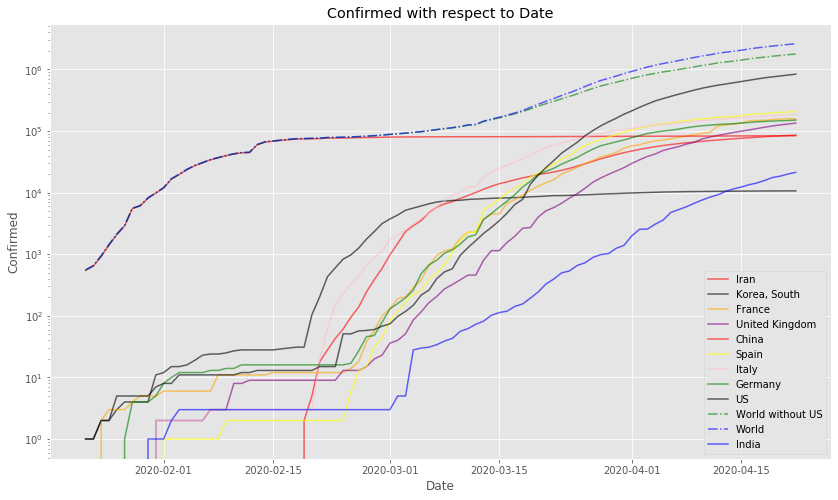

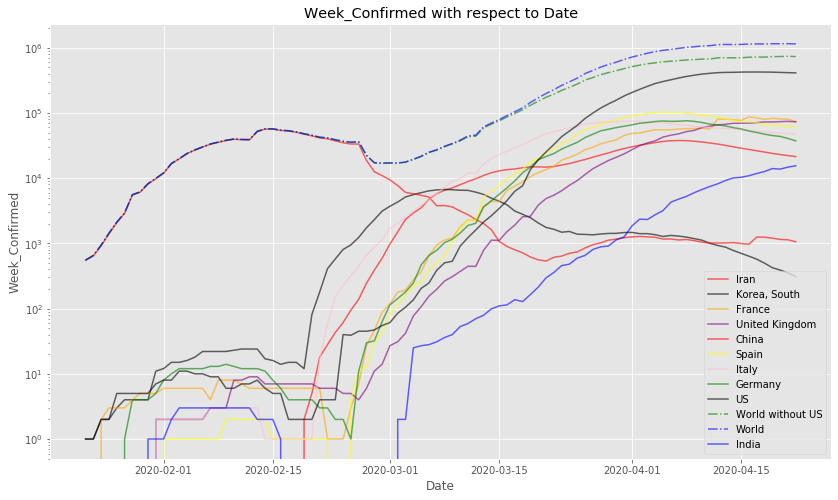

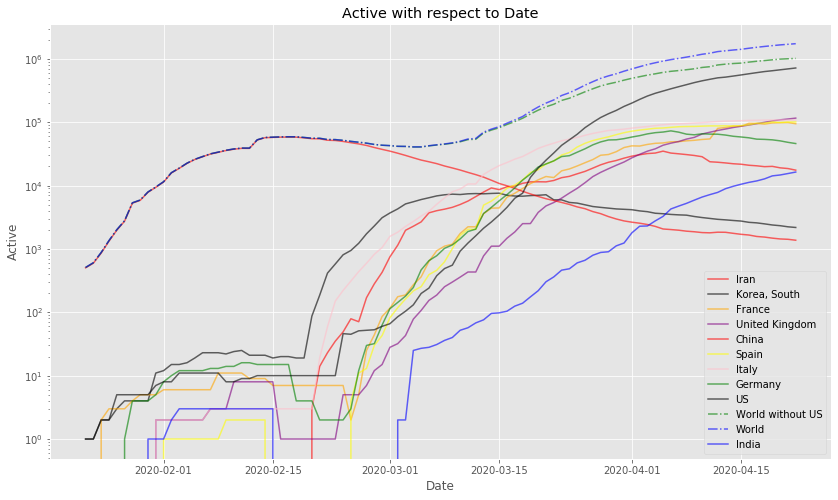

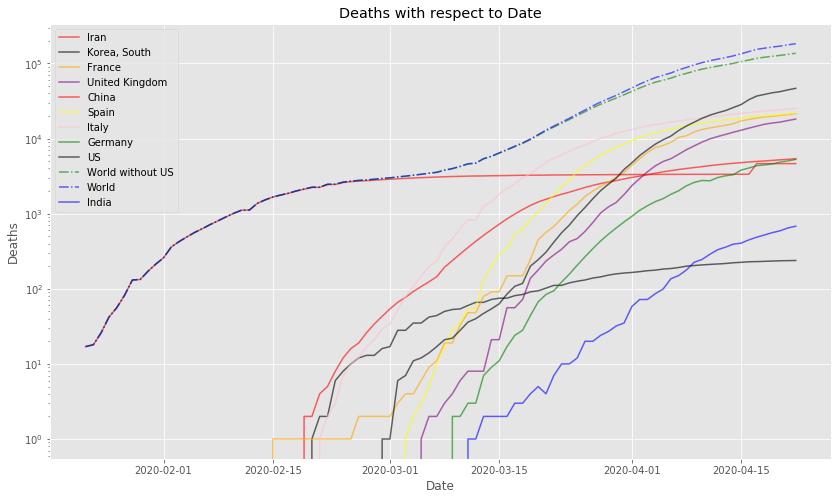

In [24]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Active', 'Deaths'])

In [25]:
DF_Dict['France']

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,2,0,0,0,2,NaN,1.000000,2,0,0,0,NaN
2020-01-25,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-26,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-27,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-28,4,0,0,0,4,NaN,1.000000,4,0,0,0,NaN
2020-01-29,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
2020-01-30,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
